In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [6]:
y.shape

(70000,)

Display the image of MNIST dataset using Matplotlib imshow()

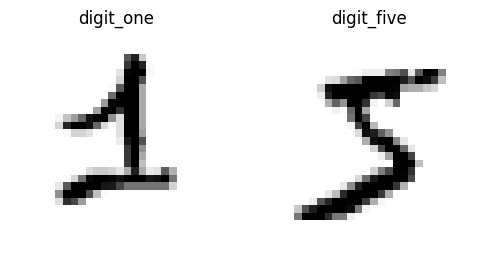

In [7]:
import matplotlib.pyplot as plt


def plot_digits(image):
    image = image.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


digit_five = X[0]
digit_one = X[24]

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_digits(digit_one)
plt.title("digit_one")

plt.subplot(1, 2, 2)
plot_digits(digit_five)
plt.title("digit_five")

plt.show()

In [8]:
y[24], y[0]

('1', '5')

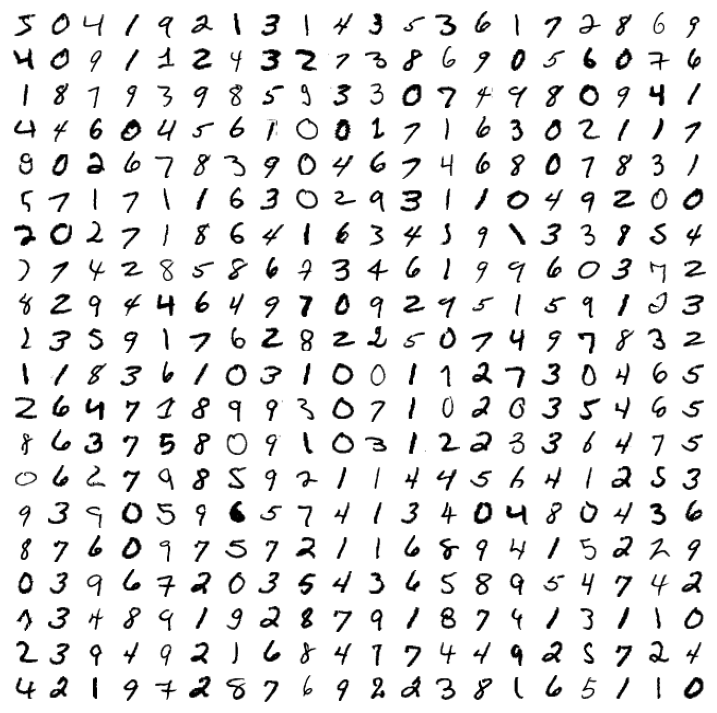

In [9]:
plt.figure(figsize=(9, 9))
for idx, img_data in enumerate(X[:400]):
    plt.subplot(20, 20, idx + 1)
    plot_digits(img_data)
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

Training a Binary Classifier

In [11]:
y_train_5 = y_train == "5"
y_test_5 = y_test == "5"

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(
    X_train, y_train_5
)  # Adding this, now sgd_classifier can be used for detection of number 5

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [13]:
# Using sgd_classifier

sgd_classifier.predict(
    [digit_one]
)  # sgd_classifier is for digit 5 but some_digit is digit 1

# So array show False

array([False])

In [14]:
sgd_classifier.predict([digit_five])

# digit_five is actually digit 5 from MNIST dataset. So, answer is True

array([ True])

Measuring Accuary using Cross-Validation
Measuring the perform of SGDClassifier using k-fold cross-validation 

In [15]:
# It will take sometime

from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_classifier, X_train, y_train_5, cv=5, scoring="accuracy")

In [16]:
score

array([0.96330357, 0.96348214, 0.96616071, 0.97098214, 0.91705357])

In [17]:
pd.Series(score).describe()

count    5.000000
mean     0.956196
std      0.022100
min      0.917054
25%      0.963304
50%      0.963482
75%      0.966161
max      0.970982
dtype: float64

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=5)

for train_idx, test_idx in skfold.split(X_train, y_train_5):
    clone_clf = clone(sgd_classifier)
    X_train_fold = X_train[train_idx]
    X_test_fold = X_train[test_idx]
    y_train_fold = y_train_5[train_idx]
    y_test_fold = y_train_5[test_idx]

    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9633035714285715
0.9634821428571428
0.9661607142857143
0.9709821428571429
0.9170535714285715


In [19]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf, X_train, y_train_5, cv=5, scoring="accuracy")

False


array([0.90982143, 0.90982143, 0.90982143, 0.90982143, 0.90982143])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=5)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[49500,  1450],
       [ 1003,  4047]])

In [22]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[50950,     0],
       [    0,  5050]])

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(
    y_train_5, y_train_pred
)  # 4047 / (4047 + 1450) [Refers to Confusion Matrix]

0.7362197562306713

In [24]:
recall_score(
    y_train_5, y_train_pred
)  # 4047 / (4047 + 1003) [Refers to Confusion Matrix]

0.8013861386138614

In [25]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7674220157390728

In [26]:
y_score = sgd_classifier.decision_function([digit_five])
y_score

array([1102.40044114])

In [27]:
threshold = 0
y_digit_five_score = y_score > threshold
y_digit_five_score

array([ True])

In [28]:
threshold = 3000
y_digit_five_score = y_score > threshold
y_digit_five_score

array([False])

In [29]:
y_score = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=5, method='decision_function')

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score)

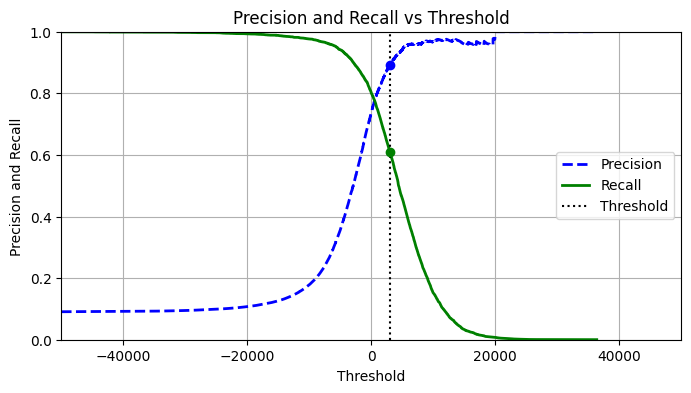

In [44]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label="Recall", linewidth=2)
plt.vlines(threshold, 0,1.0, 'k', 'dotted', label="Threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Precision and Recall")
plt.title("Precision and Recall vs Threshold")
plt.legend(loc="center right")

plt.show()


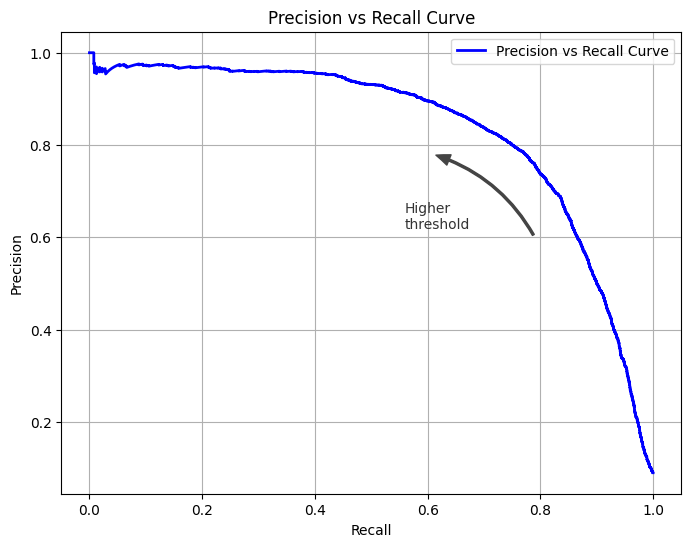

In [46]:
import matplotlib.patches as patches

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b-", linewidth=2, label="Precision vs Recall Curve")
plt.title("Precision vs Recall Curve")
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.gca().add_patch(
    patches.FancyArrowPatch(
        (0.79, 0.60),
        (0.61, 0.78),
        connectionstyle="arc3,rad=.2",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444",
    )
)
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.show()

In [48]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3264.1401108670275)

In [49]:
y_train_pred_90 = (y_score >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000603864734299

In [50]:
recall_score(y_train_5, y_train_pred_90)

0.5902970297029703